# Dota 2 Match Outcome Predictions
An attempt to see if I can make an algorithm that can predict if I will win or lose a match
<img src="logo.png" alt="IMAGE FAILED TO LOAD" style="width:200px;height:115px;">

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

### Context
- Dota 2 one of the most popular online games.  
- Valve, the company that made the game, as a free public API that releases all the data on every match that is played.  
- I was able to hunt down my data and do an interestign analysis.

In [2]:
apiKey = '0F68F5F96EC6CC04C40F0A28024E20C0'
accountID = '96887717'

### Supplying the first set of data, and every match will be found after this one

In [3]:
id = 'https://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/V001/?key='+ apiKey\
+'&matches_requested=100&account_id='+ accountID+'&min_players=10'
table1 = pd.DataFrame(pd.read_json(id).loc['matches']['result'])

### Gets all the Match ID's from my latest 500 matches

In [4]:
curr_table = table1
matches = set()
for i in curr_table['match_id']:
        matches.add(i)

for i in range(5):
    last_match = curr_table['match_id'].iloc[-1]

    id = 'https://api.steampowered.com/IDOTA2Match_570/GetMatchHistory/V001/?key='+ apiKey\
    +'&matches_requested=100&account_id='+ accountID+'&min_players=10&start_at_match_id='+str(last_match)
    curr_table = pd.DataFrame(pd.read_json(id).loc['matches']['result'])

    for i in curr_table['match_id']:
        matches.add(i)

In [5]:
len(matches)

500

In [7]:
# matches

### Uses each ID to get the data from that match

In [8]:
matchData = []
error_matches = []
initialURL = 'https://api.steampowered.com/IDOTA2Match_570/GetMatchDetails/V001/'
i = 0
for m in matches:
    try:
        match = pd.read_json(initialURL + '?match_id={}&key=0F68F5F96EC6CC04C40F0A28024E20C0'.format(m))
        vals = pd.DataFrame(match.loc['players']['result']).set_index('account_id').loc[96887717]

        # Determining if I won or not
        radiant_win = match.loc['radiant_win']['result']
        if vals['player_slot'] > 11:
            is_radiant = False
        else:
            is_radiant = True
        vals['won'] = is_radiant==radiant_win
        vals['match_id'] = match.loc['match_id']['result']
        matchData.append(vals)
        print(i, end=".")
    except:
        error_matches.append(m)
        print('Error with match: '+ str(m))
    finally:
        i+=1

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.50.51.52.53.54.55.56.57.58.59.60.61.62.63.64.65.66.67.68.69.70.71.72.73.74.75.76.77.78.79.80.81.82.83.84.85.86.87.88.89.90.91.92.93.94.95.96.97.98.99.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.117.118.119.120.121.122.123.124.125.126.127.128.129.130.131.132.133.134.135.136.137.138.139.140.141.142.143.144.145.146.147.148.149.150.151.152.153.154.155.156.157.158.159.160.161.162.163.164.165.166.167.168.169.170.171.172.173.174.175.176.177.178.179.180.181.182.183.184.185.186.187.188.189.190.191.192.193.194.195.196.197.198.199.200.201.202.203.204.205.206.207.208.209.210.211.212.213.214.215.216.217.218.219.220.221.222.223.224.225.226.227.228.229.230.231.232.233.234.235.236.237.238.239.240.241.242.243.244.245.246.247.248.249.250.251.252.253.254.255.256.257.258.259.260.261.262.263.264.265.266.267.268.269.270.271.272.273.274.275.276.27

In [10]:
df = pd.DataFrame(matchData)
df['match_id_int'] = df['match_id'].apply(lambda x: int(x))

What the Dataframe looks like

In [16]:
df.head(3)
#looks messy, index is all the same and lots of unimportant info

,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,backpack_1,...,tower_damage,hero_healing,gold,gold_spent,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,ability_upgrades,additional_units,match_id_int
96887717.0,131.0,21.0,123.0,48.0,88.0,135.0,94.0,108.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5509318656
96887717.0,131.0,42.0,151.0,63.0,12.0,8.0,73.0,21.0,0.0,16.0,...,558.0,1314.0,415.0,8160.0,4850.0,220.0,602.0,"[{'ability': 5086, 'time': 228, 'level': 1}, {...",NaN,5618616321
96887717.0,1.0,96.0,50.0,127.0,244.0,125.0,73.0,114.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5433892867


# Now cleaning

In [22]:
from datetime import date
today = date.today()
date = today.strftime("%b-%d-%Y")
print('expected file name: ' + 'MoreData/matchData_{}.csv'.format(date))

expected file name: MoreMatches/matchData_Sep-22-2020.csv


In [24]:
#Export to CSV
df.to_csv('MoreData/matchData_{}.csv'.format(date), index = False)

### Read  in CSV

In [25]:
uncleaned = pd.read_csv('dota_matches.csv')
pd.set_option('display.max_columns', None)
uncleaned.head()

,player_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,backpack_0,backpack_1,backpack_2,item_neutral,kills,deaths,assists,leaver_status,last_hits,denies,gold_per_min,xp_per_min,level,hero_damage,tower_damage,hero_healing,gold,gold_spent,scaled_hero_damage,scaled_tower_damage,scaled_hero_healing,ability_upgrades,won,match_id,custom_game,additional_units,match_id_int
0,1.0,96.0,50.0,127.0,244.0,125.0,73.0,114.0,0.0,0.0,0.0,308.0,5.0,8.0,14.0,0.0,152.0,6.0,418.0,582.0,22.0,27217.0,6650.0,0.0,3172.0,12860.0,15341.0,2511.0,0.0,"[{'ability': 5516, 'time': 232, 'level': 1}, {...",True,5.433893e+09,NaN,NaN,5433892867
1,128.0,53.0,98.0,50.0,218.0,81.0,188.0,24.0,0.0,0.0,0.0,349.0,5.0,10.0,21.0,0.0,185.0,7.0,381.0,621.0,24.0,23205.0,1362.0,2178.0,649.0,13090.0,13034.0,560.0,751.0,"[{'ability': 5247, 'time': 147, 'level': 1}, {...",False,5.439433e+09,NaN,NaN,5439432709
2,3.0,40.0,102.0,88.0,214.0,57.0,24.0,40.0,0.0,0.0,0.0,335.0,3.0,10.0,9.0,0.0,136.0,6.0,281.0,418.0,19.0,26120.0,73.0,0.0,2457.0,8220.0,16289.0,24.0,0.0,"[{'ability': 5179, 'time': 176, 'level': 1}, {...",False,5.451205e+09,NaN,NaN,5451204616
3,3.0,37.0,254.0,180.0,39.0,36.0,218.0,0.0,0.0,0.0,0.0,356.0,1.0,5.0,11.0,0.0,33.0,5.0,197.0,285.0,13.0,11299.0,0.0,6255.0,1053.0,4640.0,6028.0,0.0,4386.0,"[{'ability': 5164, 'time': 235, 'level': 1}, {...",False,5.385200e+09,NaN,NaN,5385199625
4,2.0,105.0,100.0,335.0,214.0,218.0,250.0,108.0,336.0,178.0,0.0,0.0,6.0,4.0,8.0,0.0,176.0,1.0,432.0,584.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.164104e+09,NaN,NaN,5164103689


### Removing wherever there is a 'different' game type
The game has occasional promotional or spin-off game modes that aren't much related to the core came

In [26]:
uncleaned = uncleaned[uncleaned['custom_game'].isna()].drop(['custom_game','additional_units'],axis = 1)

In [27]:
uncleaned.shape

(455, 33)

# Missingness and Cleaning

### For some reason some of the data was labeled 1/0 and others were labeled True/False

In [31]:
uncleaned['won'].value_counts()

1.0      136
0.0      112
True     108
False     99
Name: won, dtype: int64

### And we also want to remove all guaranteed irrelevent columns

In [32]:
uncleaned = uncleaned.drop(['item_0','item_1','item_2','item_3','item_4','item_5','backpack_0','backpack_1','backpack_2','item_neutral','ability_upgrades','leaver_status'], axis = 1)
uncleaned['won'] = uncleaned['won'].apply(lambda x: 1 if x in ['True', '1.0'] else 0)

In [33]:
uncleaned.to_csv('dota_matches_cleaned.csv')

### These are all the important columns, besides the NA ones

In [34]:
uncleaned.isna().sum(), uncleaned.shape

(player_slot              0
 hero_id                  0
 kills                    0
 deaths                   0
 assists                  0
 last_hits                0
 denies                   0
 gold_per_min             0
 xp_per_min               0
 level                    0
 hero_damage            272
 tower_damage           272
 hero_healing           272
 gold                   272
 gold_spent             272
 scaled_hero_damage     272
 scaled_tower_damage    272
 scaled_hero_healing    272
 won                      0
 match_id                 0
 match_id_int             0
 dtype: int64,
 (455, 21))

There's a lot of NA's (more than half the data for some variables), so I will be addressing that later

In [35]:
cleaned = pd.read_csv('dota_matches_cleaned.csv')

### Notice a few things in the following graphs
- They are seperated across 3 variables and the 2 different outcomes I want to predict
- Blue dots are means of the data set
- As expected I have less deaths when I win
    - I have more kills when I win
    - And I am usually a higher level when I win
- These are things I would believe intuitively, and  the data supports it
- The distributions are mostly normal as well
- And because of these points, I believe that these are good variables to be using

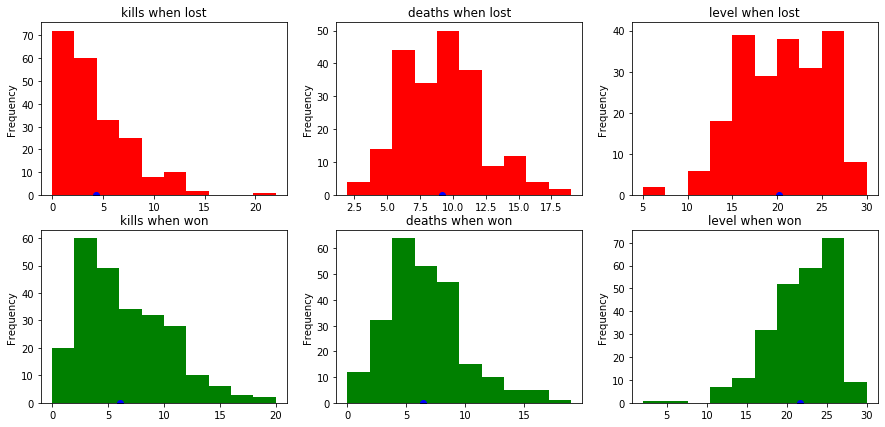

In [36]:
fig,axes = plt.subplots(2,3, figsize = (15,7))
cleaned[cleaned['won'] == 1]['kills'].plot(kind = 'hist', ax = axes[1,0], color = 'green',title = 'kills when won')
cleaned[cleaned['won'] == 0]['kills'].plot(kind = 'hist', ax = axes[0,0], color = 'red',title = 'kills when lost')

cleaned[cleaned['won'] == 1]['deaths'].plot(kind = 'hist', ax = axes[1,1], color = 'green',title = 'deaths when won')
cleaned[cleaned['won'] == 0]['deaths'].plot(kind = 'hist', ax = axes[0,1], color = 'red', title = 'deaths when lost')

cleaned[cleaned['won'] == 1]['level'].plot(kind = 'hist', ax = axes[1,2], color = 'green',title = 'level when won')
cleaned[cleaned['won'] == 0]['level'].plot(kind = 'hist', ax = axes[0,2], color = 'red',title = 'level when lost')

axes[1,1].plot(cleaned[cleaned['won'] == 1]['deaths'].mean(),0, 'ro', color = 'blue')
axes[0,1].plot(cleaned[cleaned['won'] == 0]['deaths'].mean(),0, 'ro', color = 'blue')
axes[1,0].plot(cleaned[cleaned['won'] == 1]['kills'].mean(),0, 'ro', color = 'blue')
axes[0,0].plot(cleaned[cleaned['won'] == 0]['kills'].mean(),0, 'ro', color = 'blue')
axes[1,2].plot(cleaned[cleaned['won'] == 1]['level'].mean(),0, 'ro', color = 'blue')
axes[0,2].plot(cleaned[cleaned['won'] == 0]['level'].mean(),0, 'ro', color = 'blue')

## I have 2 paths to go...
- Remove those NA columns and train my data on only **8 variables**, but **~450 data points**
- Remove the columns rows with NA , and train on **16 variables**, but only **~185 data points**

## Decided to go for more data points, and less variables, since overfitting with too many variables is a problem anyways

Variables:
- **kills**: Number enemies eliminated by the player in that match
- **deaths**: Number of times the player was eliminated 
- **assists**: Number of times the player helped eliminate an enemy
- **last_hits**: Number of points the player got from killing non-player monsters
- **denies**: Number times the player prevented the enemy from getting points for killing a non-player monster
- **gold_per_min**: Average gold points per minute (gold is used to get items)
- **xp_per_min**: Average experience points per minute (experience/XP is used to get level up and get stronger)
- **level**: A total number of XP points

### What are we dealing with?
- Supervised learning
    - The data *is labeled* 
    - This fits a method like classification/regression well
- Difference?
    - Here we are really able to use both
-  Classification
    - Can say there are only 2 categories, win or loss
    - Train the model on those distinct categories
- Regression
    - Count 1's as 'win' and 0 as 'loss' 
    - Train a model and get weights
    - Allow them model to try and predict a number between 1 and 0 given match data and the weights
    - That number is effectively a Probability that the match was won. 
    - To classify, if the Probability was >= .5, then consider it a win

### Choices
- Scikit learn has really useful functions for this
    - CalibratedClassifierCV helps classify with probabilities
    - They have built in function such as K-means, another good approach
        - Uses previous match data and sees looks at the kth most similar matches, and takes the most common outcome from those
    - A huge list of 'ensamble' classification *and* regression methods, that I have some experience with.
        - Built around averaging and aims to improve generalizability
        
### Decision
- Going to use linear regression
- Much simpler than Scikit
    - Have much more expereince and its easier to know what is happening at each step
    - Follow similar methods as we did in TA3

### Explanation of Methods
- Mostly a few simple steps  

#### Linear Regression
1. Select a model
    - My model will be a basic linear model
    - follows a y = w0 + w1x1 + w1x1 ... wnxn
2. Put data into array (matrix)
    - create the A matrix
        - the left most column will be a column of all ones, used to make w0, a weight not scaled by any inputs
        - each column in the df is a column in the matrix
3. Solve for weight vector
    - Using our A matrix, we solve y = Aw
        - y is our list of known outputs and A is the matrix we just created
4. Report the model
    - Now that we have the weights, we can fill in "w0 + w1x1 + w1x1 ... wnxn" with our weights (w's) and the X's (varaible names corresponding to each W
5. Visualize the model using predicted values
    - This part we can't really do (without some PCA) since our data is 6th dimensional

### Results
- I hope to find a model with around 75% accuracy
#### What if it doesn't meet that cutoff?
- If the model doesn't work too well, I can try to change my model by adding x^2's or other numbers to make them exponentially more important
- Try to do a test/train set
    - If the train set can predict the test set well, use the current model
    - If not, change the model and run the algorithm again